
## **<font color='blue'>Learning Objectives</font>**

A cleaned dataset is used for this assignement: **<font color='green'> 'clean_kaggle_data.csv'</font>**

This assignment focuses on one of the supervised Machine Learning Classification Algorithm - 'Ordinal Logistic Regression'. The assignment is structued into different major sections (one for each task of the assignment).

Task 1: Data Cleaning

Task 2: Exploratory Data Analysis and Feature Selection

Task 3: Model Implementation

Task 4: Model Tuning

Task 5: Testing and Discussion




## **<font color='blue'>Setup</font>**


*   Install the required libraries using `!pip install <library_name> `
*   Import the required libraries



In [1]:
#Importing required libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import io

#Installing required libraries
#!pip install <library_name>

try:
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix
    from sklearn.feature_selection import chi2
    from sklearn.feature_selection import RFE
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import KFold

except:
    !pip install -U scikit-learn
    
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix
    from sklearn.feature_selection import chi2
    from sklearn.feature_selection import RFE
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import KFold

try:
  import imblearn
  from imblearn.over_sampling import RandomOverSampler
  from imblearn.over_sampling import SMOTE
  from imblearn.under_sampling import RandomUnderSampler
except:
  !pip install imbalanced-learn
  import imblearn
  from imblearn.over_sampling import RandomOverSampler
  from imblearn.over_sampling import SMOTE
  from imblearn.under_sampling import RandomUnderSampler
  

from tqdm import tqdm

from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Saving clean_kaggle_data_2020.csv to clean_kaggle_data_2020.csv


# **<font color=#800000>Task 1: Data Cleaning</font>** 

The first section focuses on preparing the data. The task is splitted into three sections: 

<b>A. Understanding the Questions:</b>
Upon reading the Survey Logic, it can be realized that some of the questions were not common for all participants because of the experience or the acquaintance of some technologies. Although those questions can be critical in understanding the classification problem, those would still be neglected to maintain uniform features for all participants. 

The below table highlights the columns that are removed considering they might not impact the results based on their description. Some of these questions were technology specific questions answered previously such as Q18 and Q19. If the results of the model are not accurate, some of these features can than be incorporated to improve the accuracy of the model. For this assignment, these features are ignored based on initial screening of the questions.

Column|Questions|
----|----|
Q8|What programming language would you recommend an aspiring data scientist to learn first?|
Q9|Which of the following integrated development environments (IDE's) do you use on a regular basis?|
Q10|Which of the following hosted notebook products do you use on a regular basis?|
Q11|What type of computing platform do you use most often for your data science projects?|
Q18|Which categories of computer vision methods do you use on a regular basis?|
Q19|Which of the following natural language processing (NLP) methods do you use on a regular basis?|
Q20|What is the size of the company where you are employed?|
Q21|Approximately how many individuals are responsible for data science workloads...?|
Q22|Does your current employer incorporate machine learning methods into their business?|
Q25|Approximately how much money have you (or your team) spent on machine learning ... in the past 5 years?|
Q30|Which of the following big data products (...) do you use most often?|
Q32|Which of the following business intelligence tools do you use most often?|
Q36|Where do you publicly share or deploy your data analysis or machine learning applications?|
Q37|On which platforms have you begun or completed data science courses?|
Q38|What is the primary tool that you use at work or school to analyze data?|
Q39|Who/what are your favorite media sources that report on data science topics?|
*|Q26, 27, 28, 29, 31, 33, 34, 35 had alternate questions among participants based on previous questions|

<b>B. Data Cleaning:</b>
Later the cleaning will be performed based on the missing values in the dataset if neccessary.


<b>C. Encoding:</b>
There are multiple attributes in the dataset. Some of these attributes have null entries because of the structure of the survey questions. Before proceeding, Encoding will be performed to convert the Categorical Text Data to Encoded Numerical Data (dummy columns). 

<b>D. Splitting the Data into Features and Labels</b>



## **<font color='orange'>1.1 Loading Data</font>**

*   Use the provided pre-processed dataset: **'clean_kaggle_data_2020.csv'**

The above mentioned columns will be ignored. In addition, the 'Q24' column information is the label for this assignment. Hence, it will also be dropped. The total number of features from this initial screening sums upto 75 and the total number of datapoints will be 10729.



In [2]:
#1. Load the pre-processed dataset into a dataframe.

load_data = pd.read_csv(io.BytesIO(uploaded['clean_kaggle_data_2020.csv']), low_memory=False)
#load_data = pd.read_csv('clean_kaggle_data_2020.csv', low_memory=False)

#1.1 Removing the time columns and the first row which explains the questions.
load_data = load_data.iloc[1:,1:]

#1.2 Removing the mentioned columns
col_remove = ['Q8', 'Q9', 'Q10', 'Q11', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q25', 
              'Q36', 'Q37', 'Q38', 'Q39', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q32',
              'Q31', 'Q33', 'Q34', 'Q35']

#Contains all the column names along with different parts that need to be removed
col_all = []
for i in col_remove:
  all_parts = [col for col in load_data if col.startswith(i)]
  col_all.append(all_parts)
col_all = [item for sublist in col_all for item in sublist]

#1.3 Removing these columns and the 'Q24' as it is the label.
cols = [col for col in load_data.columns if col not in col_all]
load_data = load_data.loc[:, ~load_data.columns.isin(col_all)]
load_data = load_data.drop(['Q24'], axis=1)

#1.4 Print the shape of the resultant dataset
print("The shape of the data is: {}".format(load_data.shape))

The shape of the data is: (10729, 75)


## **<font color='orange'>1.2 Cleaning Dataset</font>**

This section removes the entries where unexpected NaN values are found. For the multi-answer questions, the features are already splitted into different columns. The NaN values can be replaced with zero and the text data for that column to 1. 

For Categorical Text Data columns 'Country' we can use the dummies function of the pandas library to create separate columns for each category. Before proceeding to encode the columns, we will check and remove the NaN values for these datapoints.  

If we print the columns that have NaN entries, It can be observed that question 'Q15', which asks: For how many years have you used machine learning methods?, has some unexpected NaN values. We will remove these entries.














In [3]:
#Remove rows for unexpected NaN entries for column 'Q15'
clean_data = load_data.dropna(subset = ["Q15"])

## **<font color='orange'>1.3 Encoding Dataset</font>**

**Three types of data are present in the dataset:**

*   <font color='#A52A2A'>Numerical Data (Salary but that belongs to the labels)
*   Categorical Text Data: Encode using dummy columns
*   Categorical Data with only two inputs: Replace NaN with zero and non-NaN value with 1 (This is for the columns which have multiple answers)
*   Categorical Ordinal Text Data: Age, Experience, Education etc.  ['Q1', 'Q4', 'Q6', 'Q13', 'Q15']
</font>

The encoding section focuses on converting the Categorical Data into data that can be inputted to the model.


In [4]:
#Find columns that contian NaN values (these will be the answers for different parts)
nan_col = clean_data.columns[clean_data.isna().any()].tolist()

#Consider only the top x represented countries in the dataset if required! 
#For now considered all
c_index = clean_data['Q3'].value_counts().index
a = c_index

#Considering only male and female data-points (most representation as understood from last assignment)
temp_data = clean_data[((clean_data.Q2=="Man")|(clean_data.Q2=="Woman"))&(clean_data.Q3.isin(a))].copy()

#Incidently, one of the country input was 'Other'. This can be used or not used as per preference.
#temp_data = temp_data[temp_data.Q3!="Other"]

#Multi-answer questions Encoding NaN with 0 and 1
temp_data[nan_col] = (temp_data[nan_col].notnull()).astype('int')

#For the Q5 column, removed datapoints where the answer was student, currently not employed and Other 
rem = ['Student', 'Currently not employed', 'Other']
temp_data = temp_data[~temp_data.Q5.isin(rem)]

#Create Dummy Features for Categorical Data (Non-Ordinal)
cols_dumm = ['Q3', 'Q5']

for i in cols_dumm:
  dummies_i = pd.get_dummies(temp_data[i], prefix=i)
  temp_data = temp_data.drop([i], axis=1)
  temp_data = pd.concat([temp_data, dummies_i], axis=1)


#Ordinal Columns such as Age and Experience are encoded differently
cols_ord = ['Q1', 'Q4', 'Q6', 'Q13', 'Q15']

#'Q1'
age_index = {'18-21':0, '22-24':1, '25-29':2, '30-34':3, '35-39':4, '40-44':5, 
             '45-49':6, '50-54':7, '55-59':8, '60-69':9, '70+':10}

#'Q4'
d_index =  clean_data['Q4'].value_counts().index
edu_index = {d_index[2]: 4, d_index[0]: 3,
             d_index[1]: 2, d_index[3]: 1,
             d_index[4]: 0, d_index[5]: 0, d_index[6]:0}

#'Q6'
e_index = {'I have never written code':0, '< 1 years':1, '1-2 years':2, 
           '3-5 years':3, '5-10 years':4, '10-20 years':5, '20+ years':6}	

#'Q13'
hard_index =  clean_data['Q13'].value_counts().index
h_index = {hard_index[4]: 4, hard_index[3]: 3,
             hard_index[1]: 2, hard_index[2]: 1,
             hard_index[0]:0}

#'Q15'
index = clean_data['Q15'].value_counts().index
m_index = {index[8]: 8, index[7]: 7,
           index[5]: 6, index[6]: 5,
           index[4]: 4, index[2]: 3,
           index[1]: 2, index[0]: 1, index[3]:0}

#Replacing Man string with 1 and 0 for Woman 'Q2'
g_index = {'Man':1, 'Woman':0}

#Map this ordinal variables
temp_data['Q1'] = temp_data['Q1'].map(age_index)
temp_data['Q4'] = temp_data['Q4'].map(edu_index)
temp_data['Q6'] = temp_data['Q6'].map(e_index)
temp_data['Q13'] = temp_data['Q13'].map(h_index)
temp_data['Q15'] = temp_data['Q15'].map(m_index)
temp_data['Q2'] = temp_data['Q2'].map(g_index)

#Encoding 'Q12' to make it Ordinal
q12 = [col for col in temp_data if col.startswith('Q12')]
temp_data['Q12'] = temp_data.loc[:,q12[0]]*2 + temp_data.loc[:,q12[1]]*3+ temp_data.loc[:,q12[3]]*1
temp_data = temp_data.drop(columns=q12, axis=1)

temp_data = temp_data.drop(columns=['Q12','Q13'], axis=1)

#Drop 'Q24_buckets'
temp_data = temp_data.drop(['Q24_buckets'], axis=1)

#Store the class Encoding for future reference
class_en = {0: '0-9,999', 1: '10,000-19,999', 2: '20,000-29,999', 3:'30,000-39,999',
            4: '40,000-49,999', 5: '50,000-59,999', 6: '60,000-69,999', 7: '70,000-79,999',
            8: '80,000-89,999', 9: '90,000-99,999', 10: '100,000-124,999', 11: '125,000-149,999',
            12: '150,000-199,999', 13: '200,000-249,999', 14: '>250,000'}

## **<font color='orange'>1.4 Splitting the Dataset</font>**

Splitting the dataset into X, y and plotting the distribution of the labels. It can be realized that there is an imbalance in the dataset.

In [5]:
#1.4 Separating the data into X (features) and y(labels)
X = temp_data.loc[:,~temp_data.columns.isin(['Q24_Encoded'])].copy()
y = temp_data.loc[:,temp_data.columns.isin(['Q24_Encoded'])].copy().astype(int)


The shape of the features dataset X is: (8702, 131).
The shape of the labels dataset y is: (8702, 1).

The shape of the features dataset X_train is: (5830, 131).
The shape of the labels dataset y_train is: (5830, 1).

From the below distribution plot we see there is an imbalance in the dataset


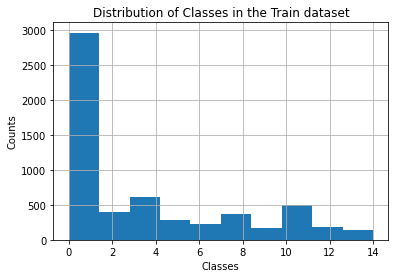

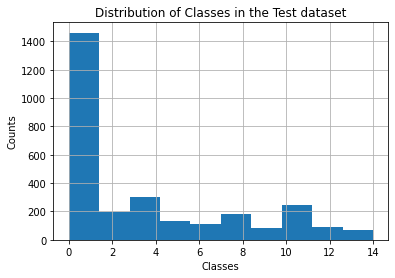

In [6]:

#1.5 Checking the shape of the dataset.
print("The shape of the features dataset X is: {}.".format(X.shape))
print("The shape of the labels dataset y is: {}.\n".format(y.shape))

#Splitting the dataset into train and test set
X_train1, X_test, y_train1, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y)

print("The shape of the features dataset X_train is: {}.".format(X_train1.shape))
print("The shape of the labels dataset y_train is: {}.\n".format(y_train1.shape))

#3. Understanding the distribution of the classes in the training set.
print("From the below distribution plot we see there is an imbalance in the dataset")
plt.figure()
y_train1['Q24_Encoded'].hist();
plt.xlabel("Classes");
plt.ylabel("Counts");
plt.title("Distribution of Classes in the Train dataset");
plt.show()

plt.figure()
y_test['Q24_Encoded'].hist();
plt.xlabel("Classes");
plt.ylabel("Counts");
plt.title("Distribution of Classes in the Test dataset");
plt.show()

#Display
#display(X.head(5))

The imbalance in the labels will degrade the possible performance of the model for a given set of features. The imbalance is highly skewed towards the class 0. With this data, the model might consider other labels as nosiy information and may ignore them during the training process. This model predictions will be biased. To overcome this effect, one solution is to create synthetic datapoints in the training set. 

There are two techniques that are widely used:
1. Oversampling 
2. Undersampling

For this assignment, one of the oversampling technique named RandomOverSampler is used. The default settings are maintained. The algorithm is applied only on the training set. 

Below is the implementation for this discussion.Although, the class imbalance is not eliminated, the data is 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


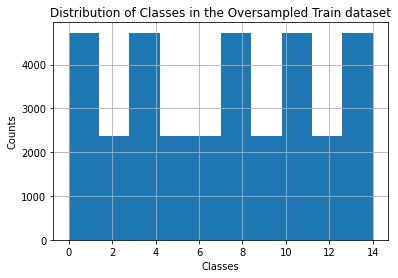

In [7]:

oversample = RandomOverSampler(random_state=130)
y_r = y_train1.to_numpy().ravel()
X_o, y_o = oversample.fit_resample(X_train1, y_r)

X_train = pd.DataFrame(data=X_o, columns=X_train1.columns)
y_train = pd.DataFrame(data=y_o, columns=y_train1.columns)
y_train.hist();
plt.xlabel("Classes");
plt.ylabel("Counts");
plt.title("Distribution of Classes in the Oversampled Train dataset");
plt.show()

#Display
#display(X.head(5))

# **<font color=#800000>Task 2: Exploratory Data Analysis and Feature Selection</font>** 

In the first section we removed some columns which were believed to have minimal impact on the yearly compensation; with this the total number of features were reduced to 75. 

Next, the encoding was performed to convert the categorical text input to numeric form. The other columns which refered to the multi-answer questions were also converted to replace the NaN values with zero and the text input for each column to 1. 

Having converted all the features to a form which can be inputted to a model, we can proceed with the next steps. 

In this section the feature selection techniques will be employed to reduce the no. of features. 




## **<font color='orange'>2.1 Exploratory Data Analysis for the selected features</font>**

In the assignment 1, a deatiled study was presented highlighting the impact of Gender, Country, Education and Experience on the yearly compensation. 

The other features that can impact salary are: 'Q5', 'Q7', 'Q14', 'Q17', 'Q23'

Before proceeding, we can explore this features to get an indepth understanding of the most critical features. For the scope of this work, we will implement filtering techniques. Although, a function is developed to plot count plot based on three features and can be used to analyze difference among them.


In [8]:
#Function to plot the catplot
def explore_final(hue_cols, col_cols, X_train, y_train):

  df = X_train.copy()
  df['y'] = y_train

  #ax = sns.countplot(hue=cols[len(cols)-3], x='y', data=df)
  g = sns.catplot(x="y", hue=hue_cols, col=col_cols,
                data=df, kind="count",
                height=4, aspect=1);

  

## **<font color='orange'>2.2 Exploring Correlation of Features with Labels</font>**

Before moving to feature selection techniques, the correlation score of each feature was calculated and plotted for visualization. The pandas 'corr' functionality is used to calculate the score which uses 'pearson' method. Based on the results, the Top 50 most correlated features are printed for visualization. 

As expected, the selected features belong to the following questions (Not all answers are selected from these features):

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q14', 'Q15', 'Q16', 'Q17', 'Q23']

Selection of features will be performed after looking at other techniques as well.

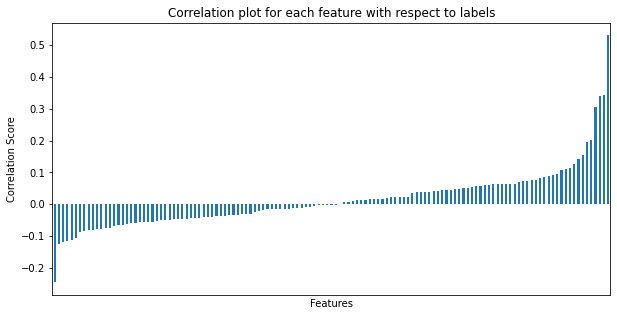

Index(['Q3_United States of America', 'Q6', 'Q15', 'Q1', 'Q3_India',
       'Q23_Part_3', 'Q23_Part_5', 'Q23_Part_4', 'Q7_Part_10', 'Q4',
       'Q5_Data Analyst', 'Q3_Russia', 'Q3_Brazil', 'Q5_Data Scientist',
       'Q23_Part_7', 'Q16_OTHER', 'Q23_Part_2', 'Q3_Other', 'Q17_Part_3',
       'Q14_Part_6', 'Q3_Israel', 'Q3_Colombia', 'Q17_Part_10', 'Q3_Italy',
       'Q23_Part_1', 'Q3_Nigeria', 'Q3_Spain', 'Q3_Taiwan', 'Q3_Poland',
       'Q17_Part_1', 'Q16_Part_13', 'Q3_Portugal', 'Q3_Ukraine', 'Q16_Part_7',
       'Q14_Part_5', 'Q3_Switzerland', 'Q3_Indonesia', 'Q3_Egypt', 'Q7_Part_2',
       'Q16_Part_5', 'Q5_Product/Project Manager', 'Q14_Part_8', 'Q3_Viet Nam',
       'Q23_Part_6', 'Q2', 'Q3_Australia', 'Q3_Greece', 'Q17_Part_4',
       'Q3_Kenya', 'Q3_Malaysia'],
      dtype='object')


In [9]:
#To explore correlation between the features and the lables

def corr_feat(X_train, y_train, n):
  df = X_train.copy()
  df['y'] = y_train

  #Use pandas .corr() function with mehtod as 'pearson' for calculating corr
  corr= df[df.columns].corr()['y'][:]
  corr.sort_values(ascending=True, inplace=True)

  #Drop the label results
  corr = corr.drop('y')

  #Plot the bar graph demonstrating the correlation
  corr.plot(kind='bar', figsize=(10,5), xticks=[]);
  plt.xlabel("Features",fontsize=10);
  plt.ylabel("Correlation Score",fontsize=10);
  plt.title("Correlation plot for each feature with respect to labels");
  plt.show()

  cor_rank = np.abs(corr)
  cor_rank = (cor_rank).sort_values(ascending=False)
  selected_corr_col = cor_rank.index[0:n]

  return selected_corr_col


#Top n highly correlated features with respect to Q24_Encoded column
selected_corr_col = corr_feat(X_train, y_train, n=50)
print(selected_corr_col)


Among the highly related features with the labels, we need to select a set which doesn't have a high corelation among themselves. The following code tries to eliminate the features which have a high dependence on one of the features. 

To do this, the features are arranged in the descending order of their absolute correlation score. The first feature is selected and the columns which have a correlation score above a certain threshold are removed. The below code explains the idea in the comments for each step. 

This algorithm helps eliminate the correlated features and a final set is returned which has a correlation less than a threshold among themselves. The threshold can be explored to achieve higher accuracies.

In [10]:
#Selected independent features among these features
def corr_ind(X_train, feat, threshold):
  '''
  function to eliminate the correlated features

  Input: 
  X_train, y_train, threshold

  Returns:
  A list of features that have minimal correlation among themselves based on the threshold
  '''
  df = X_train.copy()
  

  #Initialize an empty list. The selected columns will be appended here
  selected_corr_feat = []

  #Select the first feature from the provided feat list
  k = [feat[0]]
  
  #The start variable will have the complete list of features. This will be dynamically changed based on the correlation score. 
  #The features which have a correlation score above a threshold with respect to k will be eliminated.
  start = feat

  #The condition is set to true. The while loop will break when the condition is set to false
  cond=True

  while(cond==True):
    #The correlation scores of all the features are calculated with respect to the first element in the start list
    corr= df[start].corr()['{}'.format(start[0])][:]
    corr = corr.drop('{}'.format(start[0]))
    cor_rank = np.abs(corr)

    #The absolute scores are arranged in an ascending order (the least correlated features are placed first)
    cor_rank = (cor_rank).sort_values(ascending=True)

    #The explored feature is appended to the final list. 
    selected_corr_feat.append(start[0])

    #The start list is updated based on the threshold value. The features that have a correlation score above the threshold are removed
    start = cor_rank.index[cor_rank<threshold]

    #If the start list is emopty which means no features are left based on the condition then set cond to false. Loop breaks
    if len(start)==0:
      cond=False


  return selected_corr_feat

selected_corr_feat = corr_ind(X_train, selected_corr_col,0.30)

print("The total number of selected features are: {}".format(len(selected_corr_feat)))

#print("The selected features are:\n")
#print(selected_corr_feat)


The total number of selected features are: 42


## **<font color='orange'>2.3  Feature Selection using Filtering Technique</font>**

There are several ways of performing the feature selection. Two mehtods that were explored in this assignment are: Filter technique and Wrapper technique.

<b> 1. Filtering Technique: Chi-Square Test of Independence</b>
As the features contain categorical data and the output labels are also categorical, <b>Chi-square test will be performed to determine the dependence between the features and the labels. </b>

The p-values returned by the test will be used for further analysis.

In chi squared test p-value is used to determine if a feature is correlated with target variable. The null hypothesis of the test is:

 **H<sub>0</sub>** :- There is no relationship between categorical feature and target variable

 **H<sub>a</sub>** :- There is some relationship between categorical feature and target variable

If the p-value is more than 0.05 , null hypothesis that there is no any relationship between target variable and categorical features is not rejected. 

On the other hand if the p_value is less than 0.05 , there will be some relationship between target variable and categorical features. The features can be filtered using this technique. 

Blindly following the results won't be an appropriate approach. The results will vary as the sample size is changed. Hence, the filtering cannot be blindly followed. 

In order to further understand the importance of features, Wrapper technique was also employed in the next cell.


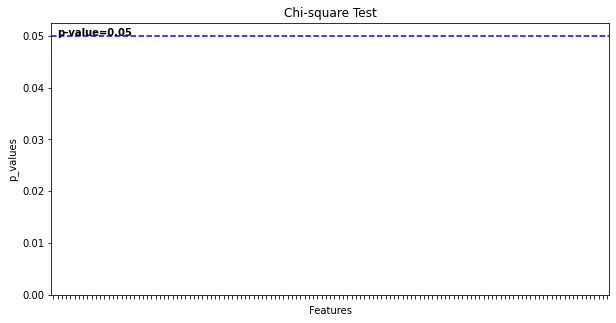

In [11]:
#Perform Chi-square Test
def chi_feat(X_train, y_train, n):
    
  f_score=chi2(X_train,y_train)

  #Extract the p-values from the f_score
  p_value=pd.Series(f_score[1],index=X_train.columns)
  p_value.sort_values(ascending=True, inplace=True)

  #Plot the p-values along with the horizontal line of 0.05 significance level
  fig,ax = plt.subplots(figsize=(10,5))
  p_value.plot(kind="bar")
  plt.axhline(y=0.05, color='blue', linestyle='--')
  plt.text(1,0.05,'p-value=0.05', fontsize=10, weight="bold")
  ax.set_xticklabels([])
  plt.xlabel("Features",fontsize=10)
  plt.ylabel("p_values",fontsize=10)
  plt.title("Chi-square Test")
  plt.show()

  #Remove the features that have p-value more than 0.05
  col_keep = [p for p in p_value.index if p_value[p]<0.05]

  selected_chi_col = col_keep[0:n]

  return selected_chi_col


#Select first n columns
selected_chi_col = chi_feat(X_train, y_train, n=50)

#print(selected_chi_col)

## **<font color='orange'>2.4  Feature Selection using Wrapping Technique</font>**

The wrapping technique is a useful method to select a set of features that can produce higher accuracies. 

The method creates several models based on the selected classification algorithm. It keeps a track of the results and the selected features. It iterates this idea untill all the features are explored. The features are than ranked based on their eliminated order. 

For this assignment, Decision Tree Classifier was used with balanced weight. 50 features were selected. 

In [12]:
#Perform RFE wrapping technique
def rfe_feat(X_train, y_train, n):

  sel_ = RFE(DecisionTreeClassifier(class_weight='balanced'), n_features_to_select=n)
  sel_.fit(X_train, y_train.to_numpy().ravel())
  selected_rfe_col = X_train.columns[(sel_.get_support())]

  return selected_rfe_col

selected_rfe_col = rfe_feat(X_train, y_train, n=50)

## **<font color='orange'>2.5 Selected Feature Set </font>**

As the problem at hand focuses on the ordinal lables, directly utilizing the features might not be the best approach as Decision Tree Classifier was used as the classification method. The ordinal information may not have been represented properly during the classification process. 

Thus, Instead of directly using the RFE results, an intersection of the feature sets from this technique and the selected features from the correlation method was used to determine the selection of the features. This combined approach will yield better results. In addition, it also helps further reduce the no. of features in an informed manner.

In [13]:
#Intersection of the two lists (wrapped and correlated ones)

selected_feat = selected_rfe_col.intersection(selected_corr_feat)
print("The total number of selected features are: {}".format(len(selected_feat)))

print(selected_feat)

The total number of selected features are: 19
Index(['Q1', 'Q2', 'Q4', 'Q7_Part_10', 'Q14_Part_5', 'Q14_Part_8',
       'Q16_Part_5', 'Q16_Part_7', 'Q17_Part_1', 'Q17_Part_4', 'Q17_Part_10',
       'Q23_Part_1', 'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_6',
       'Q3_United States of America', 'Q5_Data Analyst', 'Q5_Data Scientist',
       'Q5_Product/Project Manager'],
      dtype='object')


# **<font color=#800000>Task 3: Model Implementation</font>** 

The task 3 focuses on the implementation of the Ordinal Logistic Regression. In this assignment, I focused on implementing the algorithm explained in the class by the professor. The 'mord' library also provides ordinal logistic regression function that supports sklearn api which too can be explored for quick implementation.

## **<font color='orange'>3.1 Creating 14 different label columns </font>**
The below function create labels based on the oridal logistic regression algorithm. 14 separate label columns are added for each model.

In [14]:
def create_lablels(y_train):

  yy = y_train.copy()

  for i in range(len(class_en)-1):
    a = np.array(yy['Q24_Encoded'].values.tolist())
    yy['Model_{}'.format(i)] = np.where(a > i, 1, 0).tolist()

  return yy

## **<font color='orange'>3.2 Ordinal Logistic Regression </font>**

The below cell implements the algorithm explained in the lecture. 

Function 'define models' defines 14 separate logistic regression models. 

Function 'fit_models' fits all these models based on the provided data.

Function 'predict_all' calculates the prediction probabilities.

In [15]:
def define_models(alpha=0.01, solver = 'lbfgs'):
  dict_models = {}
  for i in range(len(class_en)-1):
    dict_models['Model_{}'.format(i)] = LogisticRegression(C=alpha, max_iter=10000, solver = solver, penalty='l2')
  
  return dict_models

def fit_models(dict_models, X, y):

  for i in range(len(class_en)-1):
    dict_models['Model_{}'.format(i)].fit(X,y['Model_{}'.format(i)])

  return dict_models

def predict_all(dict_models, X):
  y_pred_all=[]
  
  #runs loop till the last class
  for i in range(len(class_en)-1):

    #prediction of the probabilties for each model
    y_pred = dict_models['Model_{}'.format(i)].predict_proba(X)
    
    #using the predicted probabilities to find probabilities for each class
    if i==0:
      y_pred_all.append(y_pred[:,0])
      y_pred_prev = y_pred[:,1]
   
    else:
      #subtracts previos model probability with the current probability
      y_insert = y_pred_prev - y_pred[:,1]

      #Checks for negative probabilities incase if inaccurate predictions
      i_n = (np.argwhere(np.array(y_insert)<0))

      if len(i_n)!=0:
        
        #set such wrong predictions to zero
        for x in i_n:
          y_insert[x] = 0
        

      y_pred_all.append(y_insert)
      y_pred_prev = y_pred[:,1]
  
  
  y_pred_all.append(y_pred_prev)
  last = np.sum(y_pred_all, axis=0)

  y_pred_all = y_pred_all/last

  return y_pred_all

## **<font color='orange'>3.3 10-fold Cross Validation</font>**

The below cell implements the algorithm explained in the lecture. 

Function 'define models' defines 14 separate logistic regression models. 

Function 'fit_models' fits all these models based on the provided data.

Function 'predict_all' calculates the prediction probabilities.

In [16]:
def Task3(X_train, yy, K, solver, scale=False):
  #stores all the results in this dictionary
  dict_results = {}

  kfold = KFold(10, True, 1)

  #dictionary to store predicted probabilities (train and test)
  predTr = {}
  predTt = {}

  #Stores fitted models for future use if required
  models_kfold = {}

  itr=0

  Xx = X_train

  fig1, ax1 = plt.subplots()

  fig2, ax2 = plt.subplots()
  #Lists to store each fold means and std for train and test data
  means_Tr = []
  means_Tt = []
  stds_Tr = []
  stds_Tt = []

  acc_Tr = []
  acc_Tt = []

  f1_cal_Tr = []
  f1_cal_Tt = []

  means_Tr_f = []
  means_Tt_f = []
  stds_Tr_f = []
  stds_Tt_f = []

  # enumerate splits
  pos = 1
  for k in tqdm(K):

    for train, test in kfold.split(Xx, yy):
      
      #call define model function to define the models
      models = define_models(alpha=k, solver=solver)

      Xx_tr = Xx.iloc[train]
      Xx_tt = Xx.iloc[test]

      yy_tr = yy.iloc[train]
      yy_tt = yy.iloc[test]

      #scale the data using only training set
      if scale==True:
        max_tr = np.max(Xx_tr, axis=0)
        min_tr = np.min(Xx_tr, axis=0)
        Xx_tr = (Xx_tr-min_tr)/max_tr
        Xx_tt = (Xx_tt-min_tr)/max_tr

      #Fit the models
      models = fit_models(models,Xx_tr,yy_tr)

      #Predicted probabilities
      preds_tr = predict_all(models, Xx_tr)
      
      #Predicted labels
      pred_tr_label = (np.array(preds_tr)).argmax(axis=0)

      #Store results
      predTr["{}".format(itr)] = preds_tr
      acc_Tr.append(metrics.roc_auc_score(yy_tr['Q24_Encoded'], np.transpose(preds_tr), average='macro', multi_class='ovr'))
      f1_cal_Tr.append(metrics.f1_score(yy_tr['Q24_Encoded'], pred_tr_label, average='macro'))

      preds_tt = predict_all(models, Xx_tt)
      pred_tt_label = (np.array(preds_tt)).argmax(axis=0)
      predTt["{}".format(itr)] = preds_tt
      acc_Tt.append(metrics.roc_auc_score(yy_tt['Q24_Encoded'], np.transpose(preds_tt),average='macro', multi_class='ovr'))
      f1_cal_Tt.append(metrics.f1_score(yy_tt['Q24_Encoded'], pred_tt_label, average='macro'))

      itr+=1
      models_kfold["{}".format(itr)] = models
      del models

    means_Tr.append(np.mean(acc_Tr))
    stds_Tr.append(np.std(acc_Tr))
    means_Tt.append(np.mean(acc_Tt))
    stds_Tt.append(np.std(acc_Tt))

    means_Tr_f.append(np.mean(f1_cal_Tr))
    stds_Tr_f.append(np.std(f1_cal_Tr))
    means_Tt_f.append(np.mean(f1_cal_Tt))
    stds_Tt_f.append(np.std(f1_cal_Tt))

      
    ax1.boxplot([acc_Tr, acc_Tt], positions=[pos+1, pos+1.3], showfliers=False);

    ax2.boxplot([f1_cal_Tr, f1_cal_Tt], positions=[pos+1, pos+1.3], showfliers=False);
    pos+=1

  Ki = np.arange(1,len(K)+1)+1
  Kir = Ki+0.3
  var_Tr = np.array(stds_Tr)**2
  var_Tt = np.array(stds_Tt)**2
  ax1.set_xlabel("K: hyperparameter (Train|Test)")
  ax1.set_ylabel("AUC (roc)")
  ax1.set_title('Hyper parameter Vs AUC (roc) plot for solver="{}"'.format(solver))
  
  ax1.plot(Ki, means_Tr)
  ax1.scatter(Ki, means_Tr, label='Train AUC mean')

  ax1.plot(Kir, means_Tt)
  ax1.scatter(Kir, means_Tt, label='Test AUC mean')

  ax1.legend(loc='upper left')
  ax1.set_xticklabels([]);
  fig1.show();

  #Plot for f1
  var_Tr_f = np.array(stds_Tr_f)**2
  var_Tt_f = np.array(stds_Tt_f)**2
  ax2.set_xlabel("K: hyperparameter (Train|Test)")
  ax2.set_ylabel("F1 score")
  ax2.set_title('Hyper parameter Vs F1 score plot for solver="{}"'.format(solver))

  ax2.plot(Ki, means_Tr_f)
  ax2.scatter(Ki, means_Tr_f, label='Train F1 mean')

  ax2.plot(Kir, means_Tt_f)
  ax2.scatter(Kir, means_Tt_f, label='Test F1 mean')

  ax2.legend(loc='upper left')
  ax2.set_xticklabels([]);
  fig2.show();

  fig3, ax3 = plt.subplots()
  plt.plot(K, var_Tr, label = 'Train AUC variance');
  plt.scatter(K, var_Tr);
  plt.plot(K, var_Tt, label = 'Test AUC variance');
  plt.scatter(K, var_Tt);
  plt.title('Variance Plot of AUC score for solver="{}"'.format(solver));
  plt.legend();
  plt.xlabel('K: Hyperparameter');
  plt.ylabel('Variance (std^2)');
  plt.xscale('log')
  plt.show();

  fig4, ax4 = plt.subplots()
  plt.plot(K, var_Tr_f, label = 'Train F1 variance');
  plt.scatter(K, var_Tr_f);
  plt.plot(K, var_Tt_f, label = 'Test F1 variance');
  plt.scatter(K, var_Tt_f);
  plt.title('Variance Plot of F1 score for solver="{}"'.format(solver));
  plt.legend();
  plt.xlabel('K: Hyperparameter');
  plt.ylabel('Variance (std^2)');
  plt.xscale('log')
  plt.show();


  dict_results[0]=models_kfold
  dict_results[1] = predTr
  dict_results[2] = predTt
  dict_results[3] = means_Tr
  dict_results[4] = means_Tt
  dict_results[5] = stds_Tr
  dict_results[6] = stds_Tt
  dict_results[7] = acc_Tr
  dict_results[8] = acc_Tt
  dict_results[9] = means_Tr_f
  dict_results[10] = means_Tt_f
  dict_results[11] = stds_Tr_f
  dict_results[12] = stds_Tt_f
  dict_results[13] = f1_cal_Tr
  dict_results[14] = f1_cal_Tt 

  return dict_results

## **<font color='orange'>3.4.1 Hyperparameter Exploration (Regularization) for un-scaled data </font>**

The defined Task 3 function is called for performing the 10-fold cross validation for each selected hyperparameter value. The data is not-scaled in this section. 

The accuracy and the varaince plots are presented both for the train and the test data for comparison.



100%|██████████| 7/7 [01:46<00:00, 15.25s/it]


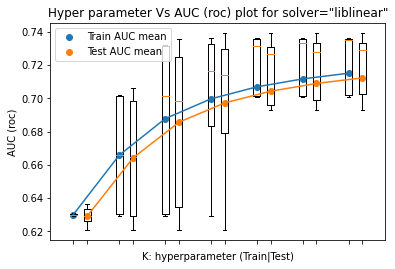

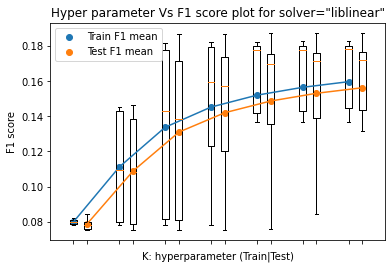

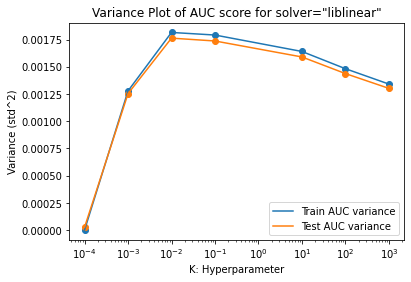

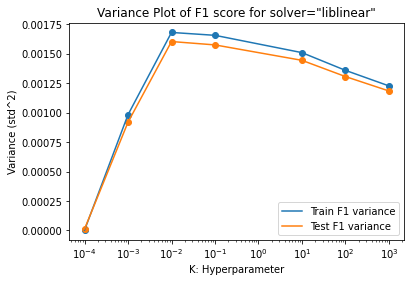

In [17]:
'''#commented
K1 = [0.0001, 0.001,0.01,0.1,10,100,1000]
solver = 'liblinear'
dict_notscaled = Task3(X_train[selected_feat],
                       create_lablels(y_train),
                       K1,
                       solver,
                       scale = False)
'''

## **<font color='orange'>3.4.2 Hyperparameter Exploration (Regularization) for scaled data </font>**

The defined Task 3 function is called for performing the 10-fold cross validation for each selected hyperparameter value. The data is not-scaled in this section. 

Similar to the previous section, the accuracy and variance plots are presented for comparison. We clearly see that the accuracy score are not impacted highly after scaling the data, but there is a significant difference in the variance results. The scaled data had less variance than the previous results.

100%|██████████| 7/7 [01:35<00:00, 13.69s/it]


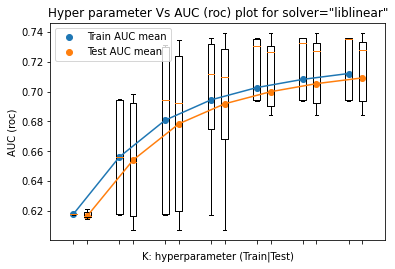

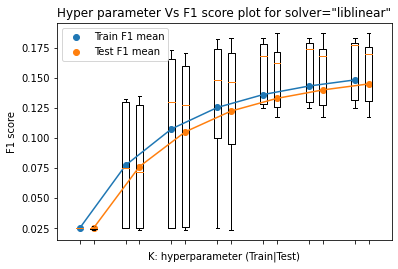

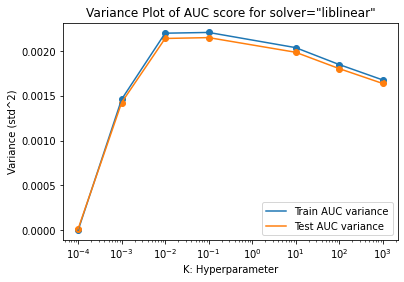

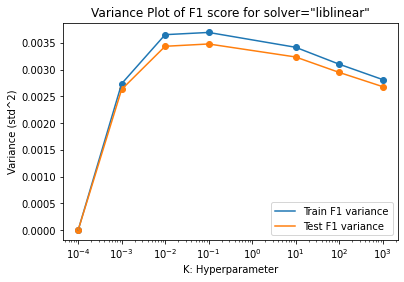

In [18]:
'''#commented
dict_scaled = {}
dict_scaled = Task3(X_train[selected_feat],
                    create_lablels(y_train),
                    K1,
                    solver,
                    scale = True)
'''

## **<font color='orange'>3.4.3 Selecting the best model </font>**

The above results are used to select the best hyperparameter value which provided best results. For the selection of the parameter value, the total error for each value was calculated. 

Total Error = Bias^2 + Variance

The hyperparameter which had the lowest value was selected. We also observe that the error is still tending to reduce which means the higher hyperparameter values can be explored in the next task of the assignment. 

The selected hyperparameter considering auc score is: 1000


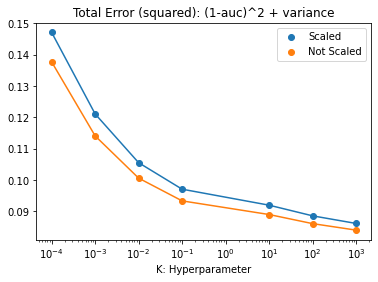

The selected hyperparameter considering f1 score is: 1000


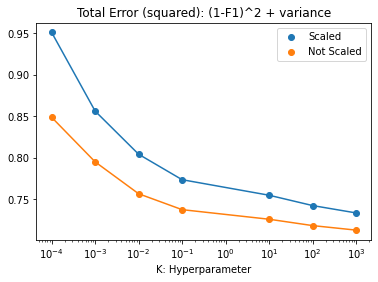

In [19]:
'''
#index where bais-variance is low on test set (10-fold)
bias = 1-np.array(dict_scaled[4])
bias_sq = (np.power(bias,2))
variance = (np.power(dict_scaled[6],2))
total_ = np.add(bias_sq, variance).tolist()
plt.plot(K1,total_)
plt.scatter(K1,total_, label='Scaled')
plt.title('Total Error (squared): (1-auc)^2 + variance')
plt.xlabel('K: Hyperparameter')
plt.xscale('log')

index_max = total_.index(min(total_))
print("The selected hyperparameter considering auc score is: {}".format(K1[index_max]))

bias = 1-np.array(dict_notscaled[4])
bias_sq = (np.power(bias,2))
variance = (np.power(dict_notscaled[6],2))
total_ = np.add(bias_sq, variance).tolist()
plt.plot(K1,total_)
plt.scatter(K1,total_, label='Not Scaled')
plt.legend();
plt.show();

#index where bais-variance is low on test set (10-fold)
bias = 1-np.array(dict_scaled[10])
bias_sq = (np.power(bias,2))
variance = (np.power(dict_scaled[12],2))
total_ = np.add(bias_sq, variance).tolist()
plt.plot(K1,total_)
plt.scatter(K1,total_, label='Scaled')
plt.title('Total Error (squared): (1-F1)^2 + variance')
plt.xlabel('K: Hyperparameter')
plt.xscale('log')

index_max = total_.index(min(total_))
print("The selected hyperparameter considering f1 score is: {}".format(K1[index_max]))

bias = 1-np.array(dict_notscaled[10])
bias_sq = (np.power(bias,2))
variance = (np.power(dict_notscaled[12],2))
total_ = np.add(bias_sq, variance).tolist()
plt.plot(K1,total_)
plt.scatter(K1,total_, label='Not Scaled')
plt.legend();
plt.show();


'''


## **<font color='orange'>3.4.5 Prediction Probabilities with hard-coded parameters </font>**

The results from the above analysis are hard coded below for final implementation in this task. The predict_test function calculates the class probabilities alongwith the roc_auc score and the labels.

The results are calculated for the test set.

In [20]:
def predict_test(models, X, y):

  preds = predict_all(models, X)

  pred_label = (np.array(preds)).argmax(axis=0)
  acc = (metrics.roc_auc_score(y['Q24_Encoded'], np.transpose(preds), average='macro', multi_class='ovr'))
  f1_cal = metrics.f1_score(y['Q24_Encoded'], pred_label, average='macro')

  return f1_cal, acc, preds, pred_label

In [21]:
#best selected model if required!
#models_kfold = dict_scaled[0]

#K[index_max] for the value from k-array
models_1 = define_models(alpha=1000, solver='liblinear')
models_c = fit_models(models_1, X_train[selected_feat],create_lablels(y_train))

f1_score, auc_score, preds, pred_label = predict_test(models_c, X_test[selected_feat], create_lablels(y_test))
print("AUC score for test set: {}".format(auc_score))
print("F1 score for the test set: {}".format(f1_score))

AUC score for test set: 0.6793357504392127
F1 score for the test set: 0.1206720839305245


In [22]:
print("Example output of probability:\n")
print((np.transpose(preds)[12]))

print("\nOriginal Label for the example in the test data: {}".format(y_test['Q24_Encoded'].to_numpy().ravel()[12]))

Example output of probability:

[0.2158165  0.16114616 0.09163368 0.12261608 0.079376   0.09838579
 0.04590496 0.02765039 0.03807138 0.02171972 0.01977635 0.01094118
 0.00232635 0.         0.06463545]

Original Label for the example in the test data: 0


# **<font color=#800000>Task 4: Model Tuning</font>** 

This section focuses on implementing the similar steps that were performed in the task 3 but with 2 different sets of hyperparameters. 





## **<font color='orange'>4.1 Hyperparameter tuning using grid search method </font>**

The hyperparameters selected for this implementation are: Regularization parameter 'C' termed as K in this assignment and the solver.

Exploration space:

K = [0.00001, 0.001, 10, 100, 10000, 1000000, 100000000000 ]

solver = ['lbfgs', 'liblinear', 'sag']

The results are discussed in depth in the report as well. But from the plots we can infer that higher the K values the better the performance of the model. The total error reduces as the K value increases. 

The evaluation metric chosen for comparison of results is 'auc_roc' score alongwith the 'macro' average. 

The highest K value gave the best results when clubbed with the 'lbfgs' solver for the final iteration.


Gridsearch solver: 'lbfgs'


100%|██████████| 7/7 [04:40<00:00, 40.13s/it]


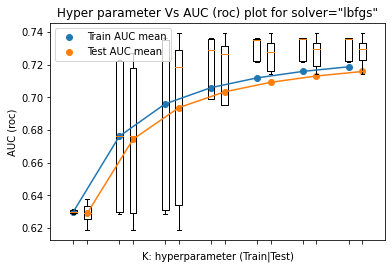

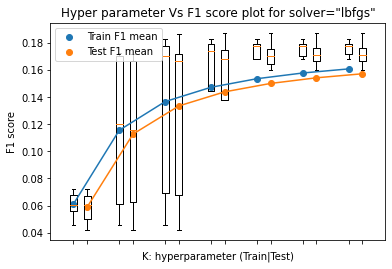

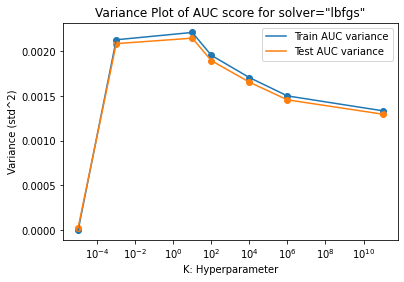

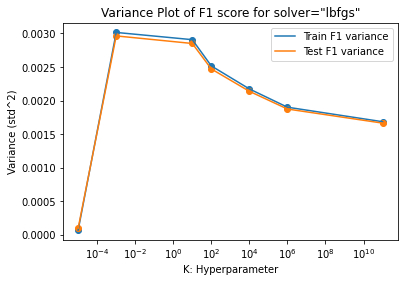

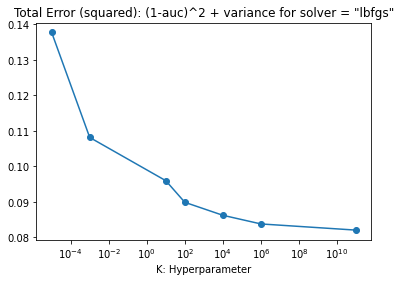

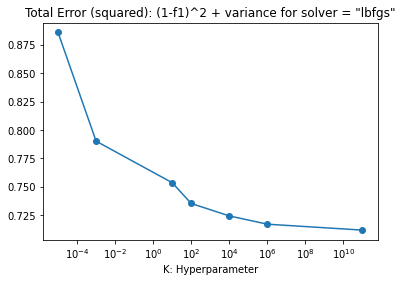


Gridsearch solver: 'liblinear'


100%|██████████| 7/7 [01:50<00:00, 15.75s/it]


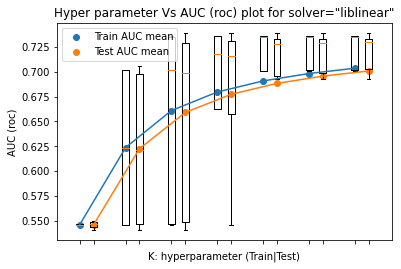

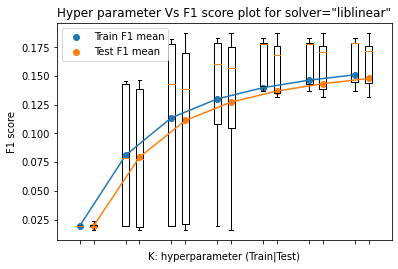

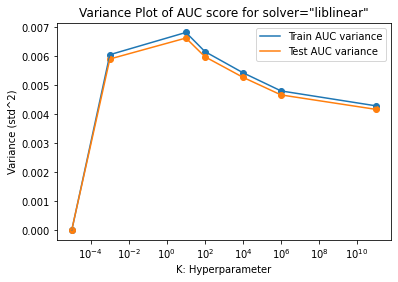

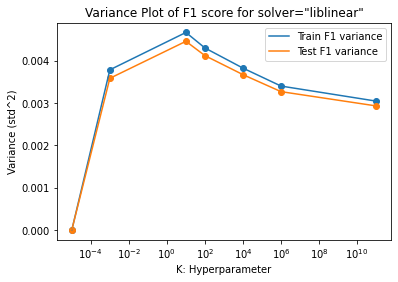

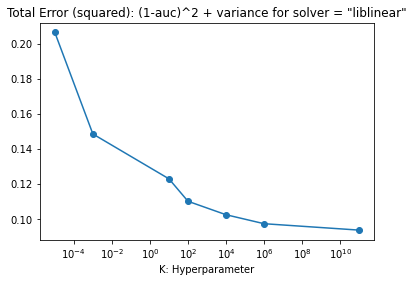

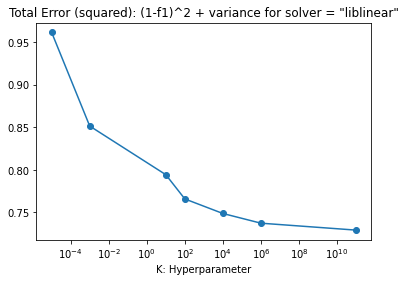


Gridsearch solver: 'sag'


100%|██████████| 7/7 [04:47<00:00, 41.09s/it]


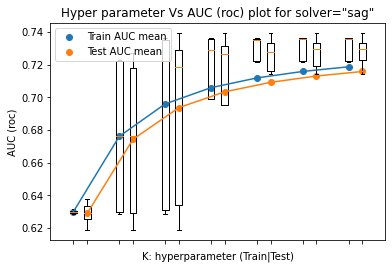

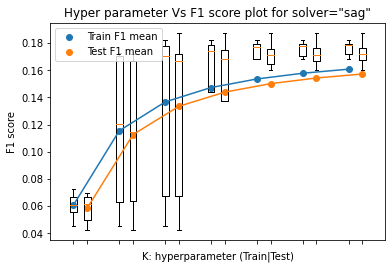

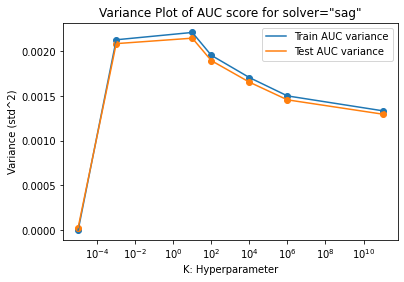

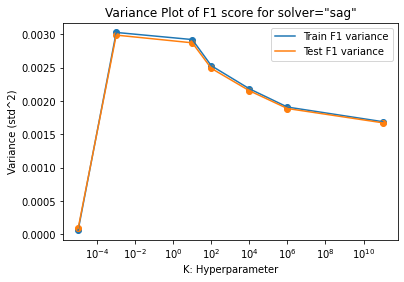

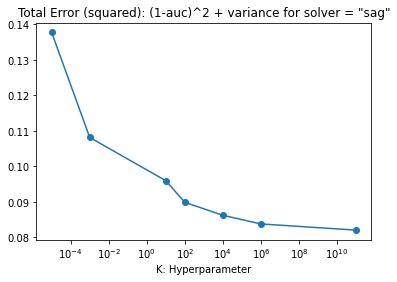

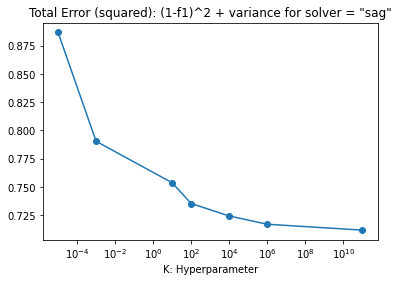

In [23]:
'''
#Two selected hyperparameters: 'K' and 'solver'
K = [0.00001, 0.001, 10, 100, 10000, 1000000, 100000000000 ]
solver = ['lbfgs', 'liblinear', 'sag']
dict_all_solvers = {}
min_error = []
min_index = []

for s in solver:
  print("\nGridsearch solver: '{}'".format(s))
  solver_ = str(s)
  if solver_ == 'liblinear':
    scale = False
  else:
    scale = False
  dict_scaled["{}".format(s)] = Task3(X_train[selected_feat],
                                      create_lablels(y_train),
                                      K,
                                      solver_,
                                      scale = scale)
  
  
  #index where bais-variance is low on test set (10-fold)
  bias = 1-np.array(dict_scaled["{}".format(s)][4])
  bias_sq = (np.power(bias,2))
  variance = (np.power(dict_scaled["{}".format(s)][6],2))
  total_ = np.add(bias_sq, variance).tolist()
  plt.plot(K, total_)
  plt.scatter(K, total_)
  plt.title('Total Error (squared): (1-auc)^2 + variance for solver = "{}"'.format(s))
  plt.xlabel('K: Hyperparameter')
  plt.xscale('log')
  plt.show()  

  min_error.append(total_)
  min_index.append(total_.index(min(total_)))

  bias1 = 1-np.array(dict_scaled["{}".format(s)][10])
  bias_sq1 = (np.power(bias1,2))
  variance1 = (np.power(dict_scaled["{}".format(s)][12],2))
  total_1 = np.add(bias_sq1, variance1).tolist()
  plt.plot(K, total_1)
  plt.scatter(K, total_1)
  plt.title('Total Error (squared): (1-f1)^2 + variance for solver = "{}"'.format(s))
  plt.xlabel('K: Hyperparameter')
  plt.xscale('log')
  plt.show()
'''
  

In [24]:

error_tuned = min_error.index(min(min_error))
index_tuned = min_index[error_tuned]
print("The selected hyperparameters are: solver = '{}', K = {}".format(solver[error_tuned],K[index_tuned]))


The selected hyperparameters are: solver = 'sag', K = 100000000000


## **<font color='orange'>4.2 Prediction Probabilities with hard-coded parameters </font>**

This section uses the parameters from the above analysis and performs predictions on both the test and the train set.

In addition, the prediction probabilities are also highlighted alongwith the original labels.

In [25]:
#If the best model is required!
#models_kfold = dict_scaled["{}".format(solver[error_tuned])][0]

models_1 = define_models(alpha=100000000000, solver='lbfgs')
models_c = fit_models(models_1, X_train[selected_feat],create_lablels(y_train))

score_f1_tt, score_tt, preds_tt, preds_label_tt = predict_test(models_c, X_test[selected_feat], create_lablels(y_test))
print("AUC score for test set: {}".format(score_tt))
print("F1 score for test set: {}".format(score_f1_tt))

score_f1_tr, score_tr, preds_tr, preds_label_tr = predict_test(models_c, X_train[selected_feat], create_lablels(y_train))
print("\nAUC score for train set: {}".format(score_tr))
print("F1 score for train set: {}".format(score_f1_tr))

AUC score for test set: 0.6793593165871187
F1 score for test set: 0.12103788898698663

AUC score for train set: 0.735583023888396
F1 score for train set: 0.18094016918640798


In [26]:
example_probs = (np.transpose(preds_tt)[150])
print("Example output of probability: \n")
print(example_probs)

print("\nOriginal Label for the example in the test data: {}".format(y_test['Q24_Encoded'].to_numpy().ravel()[150]))



Example output of probability: 

[0.08908341 0.1329214  0.09637871 0.11745429 0.19038679 0.0780476
 0.09265494 0.06984432 0.04525999 0.05016101 0.02315404 0.0061724
 0.00386563 0.00274116 0.0018743 ]

Original Label for the example in the test data: 3


# **<font color=#800000>Task 5: Testing and Discussion</font>** 

The final section continues on the previous implementation. The results obtained based on the finalized parameters are used here as well. 

In order to understand the performance of the model in terms of the prediction of labels, the confusion matrix as well as the F1 score is calculated. 

We clearly see that most of the predictions are assigned to the class 0 and several classes have almost zero classification results. This highlights the high bias of the model (ie. the prediction errors are high). 

Upon observing the accuracy scores, we can see that the model performed slightly better on the test data. One major reason to this would be the train/test split. The test datapoints were significantly less than the train datapoints. 

In [27]:
def compute_confusion_matrix(y, pred_label):
 
  f1_cal = metrics.f1_score(y['Q24_Encoded'], pred_label, average=None)
  cm = confusion_matrix(y['Q24_Encoded'], pred_label)

  return f1_cal, cm


## **<font color='orange'>5.1 F1 scores and Confusion Matrix for Train Dataset </font>**

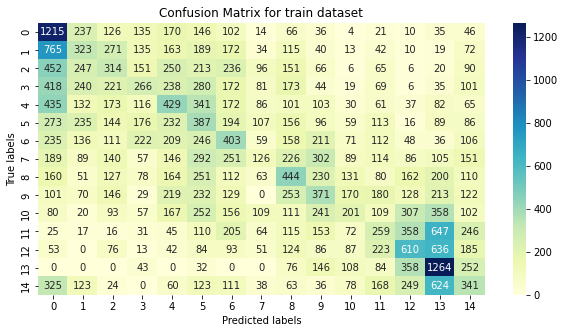


The F1 score for each class in train dataset is: 
[0.3427846  0.15082886 0.14453395 0.13739669 0.17520931 0.13968598
 0.1654691  0.07657247 0.18913738 0.16401415 0.11482434 0.127492
 0.256626   0.37585489 0.15367283]


In [28]:
f1_cal_tr, cm_tr = compute_confusion_matrix(create_lablels(y_train), preds_label_tr)

fig,ax= plt.subplots(figsize=(10,5))
sns.heatmap(cm_tr, annot=True, ax = ax,fmt='g', cmap="YlGnBu");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for train dataset');
plt.show()

#Calculating F1 score for each class using sklearn function
print("\nThe F1 score for each class in train dataset is: \n{}".format(f1_cal_tr))

## **<font color='orange'>5.2 F1 scores and Confusion Matrix for Test Dataset </font>**

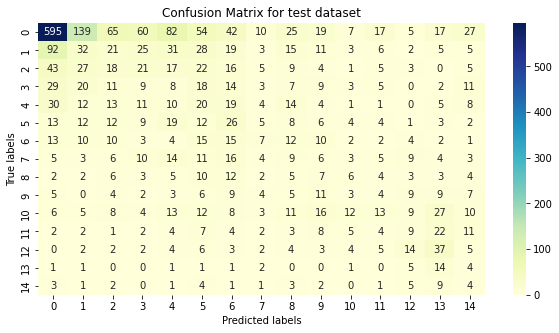


The F1 score for each class in test dataset is: 
[0.59410884 0.1130742  0.096      0.05806452 0.05434783 0.06629834
 0.0952381  0.04848485 0.04901961 0.11167513 0.11320755 0.04938272
 0.16374269 0.14736842 0.05555556]


In [29]:
f1_cal_tt, cm_tt = compute_confusion_matrix(create_lablels(y_test), preds_label_tt)

fig,ax= plt.subplots(figsize=(10,5))
sns.heatmap(cm_tt, annot=True, ax = ax,fmt='g', cmap="YlGnBu");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for test dataset');
plt.show()

#Calculating F1 score for each class using sklearn function
print("\nThe F1 score for each class in test dataset is: \n{}".format(f1_cal_tt))

## **<font color='orange'>5.3 Original and Predicted distribution of labels for Train Set </font>**

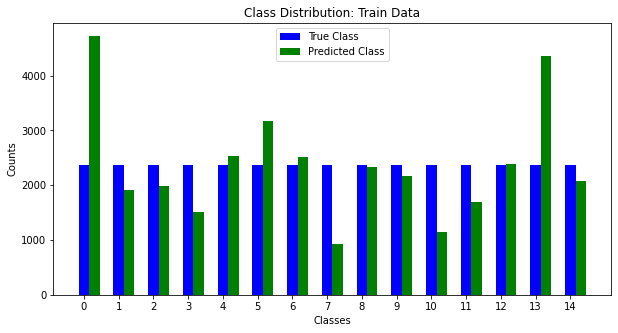

In [30]:
train_ori = np.sum(cm_tr, axis=1)
train_pre = np.sum(cm_tr, axis=0)

ind = np.arange(15)
fig,ax= plt.subplots(figsize=(10,5))
rects1 = ax.bar(ind, train_ori, width=0.3, color='blue', label='True Class')
rects2 = ax.bar(ind+0.3, train_pre, width=0.3, color='green', label='Predicted Class')
plt.xticks(ind)
plt.legend();
plt.title("Class Distribution: Train Data");
plt.xlabel('Classes');
plt.ylabel('Counts');


## **<font color='orange'>5.4 Original and Predicted distribution of labels for Test Set </font>**

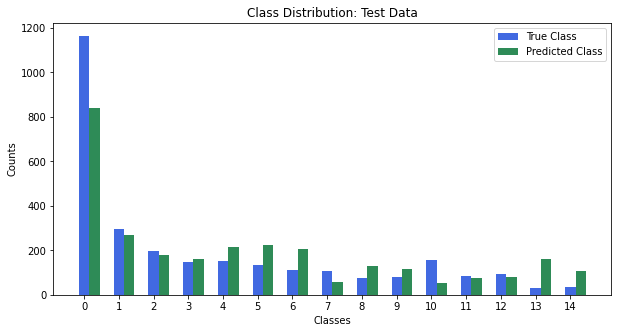

In [31]:
test_ori = np.sum(cm_tt, axis=1)
test_pre = np.sum(cm_tt, axis=0)

ind = np.arange(15)

fig,ax= plt.subplots(figsize=(10,5))
rects1 = ax.bar(ind, test_ori, width=0.3, color='royalblue', label='True Class')
rects2 = ax.bar(ind+0.3, test_pre, width=0.3, color='seagreen', label='Predicted Class')
plt.legend();
plt.xticks(ind)
plt.title("Class Distribution: Test Data");
plt.xlabel('Classes');
plt.ylabel('Counts');


# **<font color=#800000>Task 6: Conclusion</font>** 

This jupyter notebook presented the implementation for the questions asked in the assignment. 

The notebook started with the exploration of the most relevant features. Several techniques were presented to select the features which can provide higher accuracies. 

The next step focused on the implementation of single hyperparameter exploration. The aim of the task was to develop an understanding of how the model behaves upon changing the selected parameter value. Mean score as well as the the variance of the predictions accros 10-folds and at different hyperparameter values were highlgihted for comparison. Using this results, a new model was implemented with the hard-coded values. In addition, the importance of the scaling of the features was also esplored. The prediction score didn't change drastically, but there was a difference in the variance. The model which had scaled input had lower variance when compared to the model where un-scaled data was presented. 

Later, the same concept and the learnings were carried forward but two sets of hyperparameters were explored. Finally, the distribution of the predicted and original labels were presented alongwith the confusion matrix and the F1 scores for each class.

In conclusion, an indepth understanding was developed about the implementation process for a machine learning problem. Further, several methods can be analyzed to improve the model performance.